# Cats and Dogs Classifier Using CNN

Here in this notebook we use CNN(Convolutional Neural Networks) to classify cats and dogs using the infamous **cats and dogs dataset**.
You can find the dataset [here](https://www.kaggle.com/c/dogs-vs-cats/data)<br>
We are going to use **Keras** which is an open source neural-network library and running on top of Tensorflow (in this case).



## Imports

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


Using TensorFlow backend.


## Building the CNN

Here we use a very simple architecture:
- Conv2D
- Maxpooling2D
- Conv2D
- Maxpooling2D
- Flatten
- Fully Connected layer

We use Relu(Rectified Linear Units) as the activation function for both our convolutional layers.

We use **Adam** optimizer which is considered conventionally best for image classification by Andrew Ng in his Standford Course.And ofcourse we use **binary-crossentropy** as our loss function because our problem is basically binary-classification adn the metric used is **accuracy**.<br>

**Note**: We arn't using the latest version of tensorflow which is why we are getting the warnings of some functions getting depricated soon but don't worry we can just ignore those for the time being!!

In [2]:
#Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64,64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0131 00:01:50.230317 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
W0131 00:01:50.399893 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0131 00:01:50.506605 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0131 00:01:50.592347 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Pl

## Fitting the images to the CNN

We inculcate Data Augmentation for our training set which would make our training more generalized on the go.<br>
For an overview of **data augmentation** [click here](https://github.com/So-ham/Data-Augmentation)

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Let's start the training then shall we!!

In [4]:
classifier.fit_generator(training_set,# the training set
                         samples_per_epoch = 8000,
                         nb_epoch = 10,# number of epochs 
                         validation_data = test_set,# the test set
                         nb_val_samples = 2000)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=10, validation_steps=2000)`
  """
W0131 00:05:45.992238 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0131 00:05:46.080999 22360 module_wrapper.py:139] From D:\Anaconda\lib\site

Epoch 1/10


W0131 00:05:46.879862 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0131 00:05:46.880860 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0131 00:05:47.263861 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0131 00:05:47.264833 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0131 00:05:47.728619 22360 module_wrapper.py:139] From D:\Anaconda\lib\site-packages\keras\backend\te

250/250 [==============================] - 166s 663ms/step - loss: 0.6868 - acc: 0.5539 - val_loss: 0.6495 - val_acc: 0.6190
Epoch 2/10
250/250 [==============================] - 164s 657ms/step - loss: 0.6208 - acc: 0.6601 - val_loss: 0.5869 - val_acc: 0.6980
Epoch 3/10
250/250 [==============================] - 163s 653ms/step - loss: 0.5677 - acc: 0.7039 - val_loss: 0.5602 - val_acc: 0.7140
Epoch 4/10
250/250 [==============================] - 189s 756ms/step - loss: 0.5314 - acc: 0.7331 - val_loss: 0.5069 - val_acc: 0.7539
Epoch 5/10
250/250 [==============================] - 199s 797ms/step - loss: 0.5071 - acc: 0.7501 - val_loss: 0.4913 - val_acc: 0.7608
Epoch 6/10
250/250 [==============================] - 199s 797ms/step - loss: 0.4819 - acc: 0.7661 - val_loss: 0.5490 - val_acc: 0.7411
Epoch 7/10
250/250 [==============================] - 202s 810ms/step - loss: 0.4749 - acc: 0.7709 - val_loss: 0.4829 - val_acc: 0.7695
Epoch 8/10
250/250 [==============================] - 296s 

## So the accuracy of our neural network comes out to be 80%(training) and 78.8%(test) which is pretty good considering it's simplicity and also the fact that we only trained for 10 epochs !!
## Feel free to play around with it,am sure u will do far better than I did :)

## Saving the model!!

In [5]:
classifier.save("model.h5")
print("done!")

done!


## Now let's try our model on some random test samples!!

### Some imports for displaying the image and prediction using the model

In [48]:
# For preprocessing the image before feeding it to the model
import numpy as np
from keras.preprocessing import image

# For Displaying the image
import matplotlib.pyplot as plt
import matplotlib.image as imageplt


##  A couple of helper functions for prediction and display 
For the sake of simplicity I have intentionally made the functions seperate.Feel free to play around with it!!

In [49]:
def pred(path):
    img=image.load_img(path, target_size = (64,64))# Loading the image in dimensions
    img=image.img_to_array(img) # Converting the image into array
    img=np.expand_dims(img,axis=0)# making it the right format to feed it to classifier
    prediction=classifier.predict(img)[0][0]
    if prediction==0:
        print("     The Prediction is Cat")
    else:
        print("     The Prediction is Dog")
def show(path):
    im=imageplt.imread(path)
    plt.imshow(im)

## So now that everything is set,let's try out our very own image classifier with some test cases!!!

     The Prediction is Cat


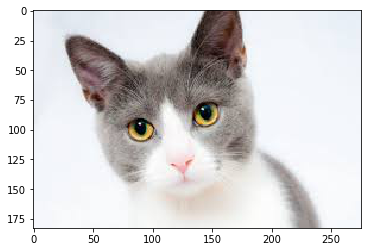

In [50]:
show('test.jfif')
pred('test.jfif')

     The Prediction is Dog


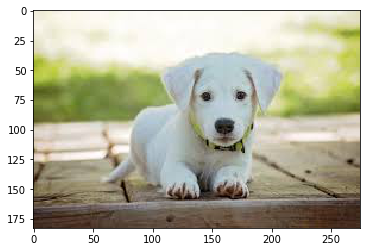

In [52]:
show('test2.jfif')
pred('test2.jfif')

# The classifier seems to be doing a neat job!!

## Well the 1st image does look like a cat to me

## And the 2nd image does look like a dog!

## Anyway feel free to play around with some images clicked by yourself and appreciate the cute-ness of these animals (forgetting the technical aspects for a moment)
## And Congratulations!! You made it!! (Pat on the back)